<a href="https://colab.research.google.com/github/ufrpe-ensino/curso-mineracao-textos/blob/respostas/05_ExercicioClassificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício: Classificando Reviews de Roupas

In [1]:
import pandas as pd

df = data = pd.read_csv("https://raw.githubusercontent.com/ufrpe-ensino/curso-mineracao-textos/master/data/ClothingReviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Unnamed: 11
0,13992,862,38,NaN,A comfortable shirt that has a touch of dressy...,4,1,2,General,Tops,Knits,NaN
1,2603,863,64,Very cute,A couple of months ago i bought the white in t...,5,1,0,General,Tops,Knits,NaN
2,8409,1046,41,Yessssss!!!!!,A culotte and basketball short hybrid. these c...,5,1,0,General,Bottoms,Pants,NaN
3,4339,1094,29,Runs very small,"A cute dress, though waist a little too high (...",4,1,26,General,Dresses,Dresses,NaN
4,12870,1078,48,Wish it had a little more shape,A cute dress. i did not have the issue with th...,4,1,0,General Petite,Dresses,Dresses,NaN


Analise a distribuição das classes, indicadas na coluna `Class Name`

In [2]:
# sua resposta
df['Class Name'].value_counts()

Dresses       96
Knits         61
Blouses       54
Sweaters      20
Jeans         17
Pants         14
Jackets       14
Skirts        13
Fine gauge    11
Outerwear      6
Lounge         5
Sleep          5
Legwear        4
Swim           4
Intimates      4
Layering       3
Shorts         3
Tops           1
Name: Class Name, dtype: int64

Analise a distribuição do comprimento dos reviews, plote um histograma (`DataFrame.plot.hist()`)

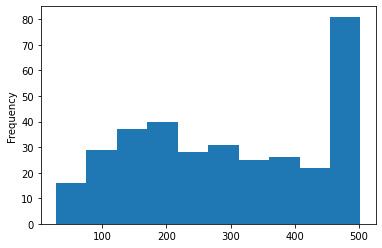

In [3]:
# sua resposta
df['ReviewLenght'] = df['Review Text'].apply(lambda x: len(x))
df['ReviewLenght'].plot.hist()

Aplique a função de encoding de rótulos categóricos do Sklearn ([LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)) para converter os rótulos de classe em numeros. Salve em uma coluna adicional no dataframe.

In [4]:
# descartar classes minoritarias
major_classes = list(df['Class Name'].value_counts()[0:4].index)
majority      = df.loc[df['Class Name'].isin(major_classes),]
minority      = df.loc[~df['Class Name'].isin(major_classes),]

print('\n',5*'=', 'major classes: \n',    majority['Class Name'].value_counts()[0:4])
print('\n',5*'=', 'minority classes: \n', minority['Class Name'].value_counts()[4:])

majority.head()


 ===== major classes: 
 Dresses     96
Knits       61
Blouses     54
Sweaters    20
Name: Class Name, dtype: int64

 ===== minority classes: 
 Fine gauge    11
Outerwear      6
Sleep          5
Lounge         5
Intimates      4
Legwear        4
Swim           4
Layering       3
Shorts         3
Tops           1
Name: Class Name, dtype: int64


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Unnamed: 11,ReviewLenght
0,13992,862,38,NaN,A comfortable shirt that has a touch of dressy...,4,1,2,General,Tops,Knits,NaN,53
1,2603,863,64,Very cute,A couple of months ago i bought the white in t...,5,1,0,General,Tops,Knits,NaN,312
3,4339,1094,29,Runs very small,"A cute dress, though waist a little too high (...",4,1,26,General,Dresses,Dresses,NaN,388
4,12870,1078,48,Wish it had a little more shape,A cute dress. i did not have the issue with th...,4,1,0,General Petite,Dresses,Dresses,NaN,216
5,1745,888,54,Nice top,A cute top. slightly tight in the upper area. ...,5,1,0,General,Tops,Knits,NaN,207


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(majority['Class Name'])
majority['label'] = le.transform(majority['Class Name'])
majority.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Unnamed: 11,ReviewLenght,label
0,13992,862,38,NaN,A comfortable shirt that has a touch of dressy...,4,1,2,General,Tops,Knits,NaN,53,2
1,2603,863,64,Very cute,A couple of months ago i bought the white in t...,5,1,0,General,Tops,Knits,NaN,312,2
3,4339,1094,29,Runs very small,"A cute dress, though waist a little too high (...",4,1,26,General,Dresses,Dresses,NaN,388,1
4,12870,1078,48,Wish it had a little more shape,A cute dress. i did not have the issue with th...,4,1,0,General Petite,Dresses,Dresses,NaN,216,1
5,1745,888,54,Nice top,A cute top. slightly tight in the upper area. ...,5,1,0,General,Tops,Knits,NaN,207,2


Aplique o pipeline de pré-processamento utilizando o NLTK ou SpaCy (tokenização e remoção de stopwords), e em seguida, utilize as funções de transformação do Scikit-Learn para textos, utilizando os atributos de n-gramas para classificar os textos:
```
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True)
```
No qual você pode passar os valores de intervalos de n-gramas:
- um intervalo de ngram de (1, 1) significa apenas unigramas
- (1, 2) significa unigramas e bigrams 
- (2, 2) significa apenas bigrams

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_onegram = TfidfVectorizer(use_idf=True, ngram_range=(1,1), max_features=1000)
vectorizer_bigram  = TfidfVectorizer(use_idf=True, ngram_range=(2,2), max_features=1000)

Separe o conjunto em treino e teste. Utilize a função `sklearn.model_selection.train_test_split()`

In [8]:
from sklearn.model_selection import train_test_split

X = majority['Review Text']
y = majority['label']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
le.classes_

array(['Blouses', 'Dresses', 'Knits', 'Sweaters'], dtype=object)

Treine um modelo com o algoritmo `NaiveBayes`, e salve as predições para o conjunto de testes na variável `preds`

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn import metrics

pipelines = [('onegram_nb', 
                Pipeline([('tfidf_onegram', vectorizer_onegram), 
                          ('nb', MultinomialNB())])),
             ('onegram_nb', 
                Pipeline([('tfidf_bigram',  vectorizer_bigram),  
                          ('nb', MultinomialNB())])),
             ('onegram_svc', 
                Pipeline([('tfidf_bigram',  vectorizer_bigram),  
                          ('nb', SVC())])),
             ('bigram_svc', 
                Pipeline([('tfidf_bigram',  vectorizer_bigram),  
                          ('nb', SVC())])),
             ('onegram_xgboost', 
                Pipeline([('tfidf_bigram',  vectorizer_bigram),  
                          ('nb', XGBClassifier())])),
             ('bigram_xgboost', 
                Pipeline([('tfidf_bigram',  vectorizer_bigram),  
                          ('nb', XGBClassifier())])),
             ]


for name, pipe in pipelines:
  print(10*'-')
  print(name)

  pipe.fit(X_train, y_train)
  preds = pipe.predict(X_test)
  print(metrics.classification_report(preds, y_test, target_names=list(le.classes_)))


----------
onegram_nb
              precision    recall  f1-score   support

     Blouses       0.00      0.00      0.00         0
     Dresses       1.00      0.42      0.59        77
       Knits       0.00      0.00      0.00         0
    Sweaters       0.00      0.00      0.00         0

    accuracy                           0.42        77
   macro avg       0.25      0.10      0.15        77
weighted avg       1.00      0.42      0.59        77

----------
onegram_nb
              precision    recall  f1-score   support

     Blouses       0.06      0.33      0.10         3
     Dresses       1.00      0.44      0.62        72
       Knits       0.10      1.00      0.18         2
    Sweaters       0.00      0.00      0.00         0

    accuracy                           0.45        77
   macro avg       0.29      0.44      0.22        77
weighted avg       0.94      0.45      0.58        77

----------
onegram_svc
              precision    recall  f1-score   support

     Blo

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMe

              precision    recall  f1-score   support

     Blouses       0.33      0.27      0.30        22
     Dresses       0.66      0.88      0.75        24
       Knits       0.40      0.28      0.33        29
    Sweaters       0.14      0.50      0.22         2

    accuracy                           0.47        77
   macro avg       0.38      0.48      0.40        77
weighted avg       0.45      0.47      0.45        77

----------
bigram_xgboost
              precision    recall  f1-score   support

     Blouses       0.33      0.27      0.30        22
     Dresses       0.66      0.88      0.75        24
       Knits       0.40      0.28      0.33        29
    Sweaters       0.14      0.50      0.22         2

    accuracy                           0.47        77
   macro avg       0.38      0.48      0.40        77
weighted avg       0.45      0.47      0.45        77



Analise os resultados das predições

In [10]:
# no loop anterior

Discuta os resultados. 